In [19]:
import pandas as pd

In [20]:
from scipy.stats import pearsonr
import matplotlib.pyplot as plt
import numpy as np

In [21]:
erp_df = pd.read_csv(r"C:\Users\sivam\Python Prog\DataCourse\tripadvisor_clean.csv")

In [22]:
print("European Restaurants:", erp_df.shape)

European Restaurants: (598442, 14)


In [23]:
print(type(erp_df))

<class 'pandas.core.frame.DataFrame'>


In [24]:
print(erp_df.shape)

(598442, 14)


In [25]:
erp_df.head

<bound method NDFrame.head of                    restaurant_name  country               region  \
0                           Le 147   France   Nouvelle-Aquitaine   
1                 Le Saint Jouvent   France   Nouvelle-Aquitaine   
2                  Au Bout du Pont   France  Centre-Val de Loire   
3              Le Relais de Naiade   France   Nouvelle-Aquitaine   
4             Relais Du MontSeigne   France            Occitanie   
...                            ...      ...                  ...   
598437  Magdalena Merlo Restaurant  Hungary      Central Hungary   
598438              Palinka Terasz  Hungary      Central Hungary   
598439          Marta Mama Mannaja  Hungary      Central Hungary   
598440       One Million Shake Bar  Hungary      Central Hungary   
598441                    Beszallo  Hungary      Central Hungary   

                            city  \
0                  Saint-Jouvent   
1                  Saint-Jouvent   
2                     Rivarennes   
3        

In [26]:
erp_df.describe()

,avg_rating,excellent,very_good,average,poor,terrible,food,service
count,598442.000000,598442.000000,598442.000000,598442.000000,598442.000000,598442.000000,598442.000000,598442.000000
mean,4.044650,29.279655,11.933907,4.707485,2.785386,3.448984,2.524479,2.541696
std,0.721328,97.995269,37.544969,16.563017,10.228778,12.190898,2.051414,2.043928
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.500000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.000000,4.000000,2.000000,1.000000,0.000000,0.000000,3.500000,3.500000
75%,4.500000,15.000000,7.000000,3.000000,1.000000,2.000000,4.500000,4.500000
max,5.000000,9383.000000,4091.000000,1682.000000,991.000000,948.000000,5.000000,5.000000


In [27]:
# Show missing value percentages
missing_percent = (erp_df.isnull().sum() / len(erp_df)) * 100
print(missing_percent)

restaurant_name    0.000000
country            0.000000
region             6.870173
city               0.000000
address            0.000000
cuisines           0.000000
avg_rating         0.000000
excellent          0.000000
very_good          0.000000
average            0.000000
poor               0.000000
terrible           0.000000
food               0.000000
service            0.000000
dtype: float64


In [28]:
erp_df.isnull().sum()[erp_df.isnull().sum() > 0]

region    41114
dtype: int64

In [29]:
erp_df = erp_df.dropna(axis=1, how='all')

In [30]:
#Check how severe the missing data is
print("\n---- Missing Value Percentage ----")
print((erp_df.isnull().sum() / len(erp_df) * 100).round(2))


---- Missing Value Percentage ----
restaurant_name    0.00
country            0.00
region             6.87
city               0.00
address            0.00
cuisines           0.00
avg_rating         0.00
excellent          0.00
very_good          0.00
average            0.00
poor               0.00
terrible           0.00
food               0.00
service            0.00
dtype: float64


In [31]:
print(erp_df.dtypes)
print(erp_df['country'].unique())

restaurant_name     object
country             object
region              object
city                object
address             object
cuisines            object
avg_rating         float64
excellent          float64
very_good          float64
average            float64
poor               float64
terrible           float64
food               float64
service            float64
dtype: object
['France' 'The Netherlands' 'Germany' 'Austria' 'Spain' 'England'
 'Northern Ireland' 'Scotland' 'Wales' 'Italy' 'Ireland' 'Sweden'
 'Belgium' 'Greece' 'Croatia' 'Portugal' 'Slovakia' 'Czech Republic'
 'Hungary']


In [32]:
# Fix for text column 'country'
if 'country' in erp_df.columns:
    # Check if mode exists (to avoid errors if the column is all NaNs)
    if not erp_df['country'].mode().empty:
        most_frequent = erp_df['country'].mode()[0]
        erp_df['country'] = erp_df['country'].fillna(most_frequent)
        print(f"Filled missing values in 'country' with the most frequent category: {most_frequent}")
    else:
        print("Column 'country' is empty or all-NaN; could not fill missing values.")

Filled missing values in 'country' with the most frequent category: France


In [33]:
# ~~Example: Convert numeric columns stored as strings~~
numeric_columns = ['country']  # adjust as per your dataset
for col in numeric_columns:
    if col in erp_df.columns:
        erp_df[col] = pd.to_numeric(erp_df[col], errors='coerce')
        print(f"Converted '{col}' to numeric type.")

Converted 'country' to numeric type.


In [34]:
# --- Identify Duplicates ---
duplicate_count = erp_df.duplicated().sum()
print(f"\n---- Duplicate Rows Found: {duplicate_count} ----")


---- Duplicate Rows Found: 0 ----


In [35]:
# --- Remove Duplicates ---
if duplicate_count > 0:
    erp_df = erp_df.drop_duplicates()
    print("Duplicate rows removed successfully.")

In [36]:
# --- Verify ---
print(f"Remaining rows after cleanup: {erp_df.shape[0]}")
import seaborn as sns

Remaining rows after cleanup: 598442


In [37]:
# --- Select numeric columns only ---
numeric_cols = erp_df.select_dtypes(include=['float64', 'int64']).columns

In [38]:
print(erp_df['country'].describe())
print(erp_df['country'].unique())

count    0.0
mean     NaN
std      NaN
min      NaN
25%      NaN
50%      NaN
75%      NaN
max      NaN
Name: country, dtype: float64
[nan]


In [39]:
erp_df['country'] = pd.to_numeric(erp_df['country'], errors='coerce')
print(erp_df['country'].isna().sum())

598442


In [40]:
erp_df['country'] = erp_df['country'].astype('category').cat.codes

In [41]:
!pip install tabulate

In [43]:
import pandas as pd

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

# Read the CSV file into a DataFrame
erp_df = pd.read_csv(r"C:\Users\sivam\Python Prog\DataCourse\tripadvisor_clean.csv")

# Display the first 5 rows
print(erp_df.head().to_markdown(index=False, numalign="left", stralign="left"))

# Print the column names and their data types
print(erp_df.info())

| restaurant_name      | country   | region              | city                     | address                                                    | cuisines         | avg_rating   | excellent   | very_good   | average   | poor   | terrible   | food   | service   |
|:---------------------|:----------|:--------------------|:-------------------------|:-----------------------------------------------------------|:-----------------|:-------------|:------------|:------------|:----------|:-------|:-----------|:-------|:----------|
| Le 147               | France    | Nouvelle-Aquitaine  | Saint-Jouvent            | 10 Maison Neuve, 87510 Saint-Jouvent France                | French           | 4            | 2           | 0           | 0         | 0      | 0          | 4      | 4.5       |
| Le Saint Jouvent     | France    | Nouvelle-Aquitaine  | Saint-Jouvent            | 16 Place de l Eglise, 87510 Saint-Jouvent France           | Not specified    | 4            | 2           | 2           |

| country          | restaurant_count   |
|:-----------------|:-------------------|
| France           | 144350             |
| England          | 111051             |
| Germany          | 92062              |
| Spain            | 49621              |
| Greece           | 31134              |
| Italy            | 29981              |
| Portugal         | 29345              |
| The Netherlands  | 26000              |
| Austria          | 18141              |
| Czech Republic   | 12726              |
| Sweden           | 11857              |
| Ireland          | 10305              |
| Scotland         | 8789               |
| Wales            | 8523               |
| Belgium          | 5450               |
| Slovakia         | 3446               |
| Croatia          | 2846               |
| Northern Ireland | 2378               |
| Hungary          | 437                |


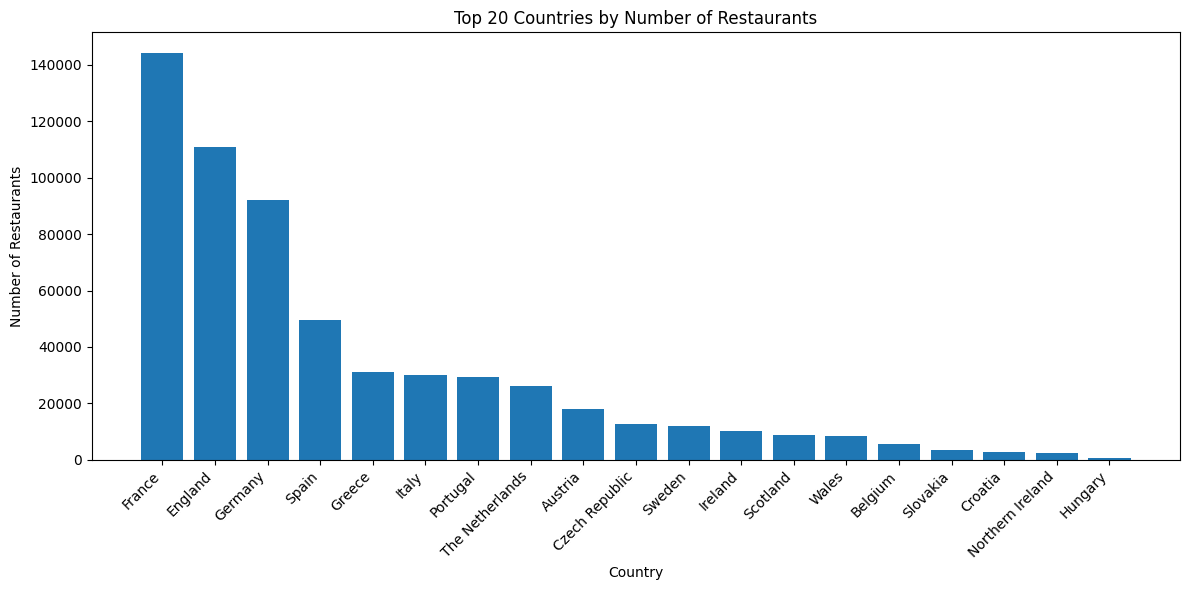

In [44]:
import matplotlib.pyplot as plt

# Count the number of restaurants per country
country_counts = erp_df['country'].value_counts().reset_index()
country_counts.columns = ['country', 'restaurant_count']

# Get the top 20 countries
top_20_countries = country_counts.head(20)

# Create a bar plot
plt.figure(figsize=(12, 6))
plt.bar(top_20_countries['country'], top_20_countries['restaurant_count'])
plt.xlabel('Country')
plt.ylabel('Number of Restaurants')
plt.title('Top 20 Countries by Number of Restaurants')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Save the plot
plt.savefig('top_20_countries_restaurants.png')

# Print the top 20 countries data for reference
print(top_20_countries.to_markdown(index=False, numalign="left", stralign="left"))

In [45]:
import pandas as pd

# 1. Load the dataset
df = pd.read_csv(r"C:\Users\sivam\Python Prog\DataCourse\tripadvisor_clean.csv")

# 2. Split and Explode 'cuisines'
# This turns a row with "French, European" into two rows: "French" and "European"
df['cuisines'] = df['cuisines'].str.split(', ')
df_exploded = df.explode('cuisines')
# Clean whitespace just in case
df_exploded['cuisines'] = df_exploded['cuisines'].str.strip()

# 3. Calculate metrics
# Helper for reviews
cols_review = ['excellent', 'very_good', 'average', 'poor', 'terrible']
df_exploded['num_reviews'] = df_exploded[cols_review].sum(axis=1)

# Group by Country and Single Cuisine
grouped_df = df_exploded.groupby(['country', 'cuisines']).agg({
    'restaurant_name': 'count',  # Count of restaurants with this cuisine
    'avg_rating': 'mean',        # Average rating
    'num_reviews': 'sum'         # Total reviews
}).reset_index()

# Rename columns
grouped_df.rename(columns={
    'restaurant_name': 'restaurant_count',
    'avg_rating': 'average_rating',
    'num_reviews': 'total_reviews'
}, inplace=True)

# 4. Calculate Percentage
# Percentage = (Number of restaurants serving X) / (Total unique restaurants in Country)
country_totals = df.groupby('country').size().reset_index(name='country_total')
final_df = pd.merge(grouped_df, country_totals, on='country')

final_df['percentage'] = (final_df['restaurant_count'] / final_df['country_total']) * 100

# 5. Final Formatting
output_df = final_df[['country', 'cuisines', 'restaurant_count', 'percentage', 'average_rating', 'total_reviews']]

# Display result
output_df

,country,cuisines,restaurant_count,percentage,average_rating,total_reviews
0,Austria,Afghani,9,0.049611,3.777778,49.0
1,Austria,African,9,0.049611,4.611111,83.0
2,Austria,Albanian,1,0.005512,4.500000,2.0
3,Austria,Algerian,1,0.005512,4.000000,2.0
4,Austria,American,327,1.802547,4.050459,8182.0
5,Austria,Apulian,2,0.011025,3.000000,48.0
6,Austria,Arabic,31,0.170884,4.338710,244.0
7,Austria,Argentinian,12,0.066149,4.250000,637.0
8,Austria,Armenian,4,0.022050,4.000000,199.0
9,Austria,Asian,841,4.635908,4.093936,20408.0


In [46]:
import pandas as pd

# 1. LOAD DATA (Fresh reload to avoid errors)
# Make sure 'tripadvisor_clean.csv' is in the same folder as this notebook
df = pd.read_csv(r"C:\Users\sivam\Python Prog\DataCourse\tripadvisor_clean.csv")

print(f"Loaded {len(df)} rows from dataset.")

# 2. PROCESS CUISINES
# Ensure the column is string type and handle missing values before splitting
df['cuisines'] = df['cuisines'].fillna('Not specified').astype(str)
df['cuisines'] = df['cuisines'].str.split(', ')
df_exploded = df.explode('cuisines')

# Clean whitespace
df_exploded['cuisines'] = df_exploded['cuisines'].str.strip()

print(f"Rows after splitting cuisines: {len(df_exploded)}")

# 3. CALCULATE METRICS
# Convert review columns to numeric just in case, treating errors as 0
cols_review = ['excellent', 'very_good', 'average', 'poor', 'terrible']
for col in cols_review:
    df_exploded[col] = pd.to_numeric(df_exploded[col], errors='coerce').fillna(0)

df_exploded['num_reviews'] = df_exploded[cols_review].sum(axis=1)

# Group by Country and Cuisine
grouped_df = df_exploded.groupby(['country', 'cuisines']).agg({
    'restaurant_name': 'count',
    'avg_rating': 'mean',
    'num_reviews': 'sum'
}).reset_index()

grouped_df.rename(columns={
    'restaurant_name': 'restaurant_count',
    'avg_rating': 'average_rating',
    'num_reviews': 'total_reviews'
}, inplace=True)

# 4. CALCULATE PERCENTAGE
country_totals = df.groupby('country').size().reset_index(name='country_total')
final_df = pd.merge(grouped_df, country_totals, on='country')

final_df['percentage'] = (final_df['restaurant_count'] / final_df['country_total']) * 100

# Select final columns
output_df = final_df[['country', 'cuisines', 'restaurant_count', 'percentage', 'average_rating', 'total_reviews']]

# 5. SAVE INTERMEDIATE FILE
output_filename = 'tripadvisor_aggregated_cuisines.csv'
output_df.to_csv(output_filename, index=False)

print(f"\nSuccess! Intermediate file '{output_filename}' created with {len(output_df)} rows.")
print("Here are the first 5 rows:")
print(output_df.head())

Loaded 598442 rows from dataset.
Rows after splitting cuisines: 1303024

Success! Intermediate file 'tripadvisor_aggregated_cuisines.csv' created with 2277 rows.
Here are the first 5 rows:
   country  cuisines  restaurant_count  percentage  average_rating  \
0  Austria   Afghani                 9    0.049611        3.777778   
1  Austria   African                 9    0.049611        4.611111   
2  Austria  Albanian                 1    0.005512        4.500000   
3  Austria  Algerian                 1    0.005512        4.000000   
4  Austria  American               327    1.802547        4.050459   

   total_reviews  
0           49.0  
1           83.0  
2            2.0  
3            2.0  
4         8182.0  
